In [1]:
!nvidia-smi

Mon Jul 11 21:43:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://huggingface.co/ffarzad/xlnet_sentiment

Cloning into 'xlnet_sentiment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


## Lấy dữ liệu

In [3]:
!gdown https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
!gdown https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
!gdown https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
!gdown https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
!gdown https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
!gdown https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP

Downloading...
From: https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
To: /content/train.rar
100% 189k/189k [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
To: /content/test.rar
100% 57.5k/57.5k [00:00<00:00, 70.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
To: /content/dev.rar
100% 29.2k/29.2k [00:00<00:00, 32.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
To: /content/VnCoreNLP-1.1.1.jar
100% 27.4M/27.4M [00:00<00:00, 41.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
To: /content/models-20220212T185004Z-001.zip
100% 227k/227k [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP
To: /content/data.rar
100% 13.6k/13.6k [00:00<00:00, 23.4MB/s]


In [4]:
!unzip /content/models-20220212T185004Z-001.zip
!unrar x train.rar
!unrar x dev.rar
!unrar x test.rar
!unrar x data.rar

Archive:  /content/models-20220212T185004Z-001.zip
  inflating: models/wordsegmenter/wordsegmenter.rdr  
  inflating: models/wordsegmenter/vi-vocab  

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from train.rar

Creating    train                                                     OK
Extracting  train/sentiments.txt                                           1%  OK 
Extracting  train/sents.txt                                               19% 36% 53% 71% 88% 98%  OK 
Extracting  train/topics.txt                                              99%  OK 
All OK

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from dev.rar

Creating    dev                                                       OK
Extracting  dev/sentiments.txt                                             1%  OK 
Extracting  dev/sents.txt                                                 97%  OK 
Extract

In [5]:
!gdown https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
!mv sentiments.txt train/
!gdown https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
!mv sentiments.txt test/
!gdown https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
!mv sentiments.txt dev/
!gdown https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
!mv topics.txt dev/

Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
To: /content/sentiments.txt
100% 22.9k/22.9k [00:00<00:00, 37.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
To: /content/sentiments.txt
100% 6.33k/6.33k [00:00<00:00, 11.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
To: /content/sentiments.txt
100% 3.17k/3.17k [00:00<00:00, 6.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
To: /content/topics.txt
100% 3.17k/3.17k [00:00<00:00, 6.26MB/s]


In [6]:
!rm -r *.rar *.txt *.zip

rm: cannot remove '*.txt': No such file or directory


# Đọc dữ liệu

In [7]:
#@title Library
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import matplotlib.pyplot as plt
import json
import re
from sklearn.model_selection import train_test_split

In [8]:
TRAIN_PATH = "train"
DEV_PATH = "dev"
TEST_PATH = "test"
DATA_ADDED = "data"

In [9]:
data = np.genfromtxt(os.path.join(DATA_ADDED , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DATA_ADDED , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
added = pd.DataFrame({"review":data,"sentiment":label})
added.to_csv("added_data.csv")

In [10]:
data = np.genfromtxt(os.path.join(DEV_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DEV_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
dev = pd.DataFrame({"review":data,"sentiment":label,"topic":topics})
dev.to_csv("dev.csv")

In [11]:
data = np.genfromtxt(os.path.join(TRAIN_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TRAIN_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(TRAIN_PATH , 'topics.txt'), delimiter='\n', dtype=int)
train = pd.DataFrame({"review":data,"sentiment":label,"topic":topics})
train_original = pd.concat([train , dev], axis = 0 )
train = pd.concat([train , dev, added], axis = 0 )
train_original.to_csv("train_original.csv")
train.to_csv("train.csv")

In [12]:
data = np.genfromtxt(os.path.join(TEST_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TEST_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(TEST_PATH , 'topics.txt'), delimiter='\n', dtype=int)
test = pd.DataFrame({"review":data,"sentiment":label,"topic":topics})
test.to_csv("test.csv")

In [13]:
#@title Install library
!pip install -q -U watermark
!pip install -qq transformers
!pip install -qq sentencepiece
!pip install -qq vncorenlp
!pip install -qq fastBPE
!pip install -qq fairseq
!pip install -qq ray[tune]

     |████████████████████████████████| 4.4 MB 14.3 MB/s 
     |████████████████████████████████| 596 kB 63.9 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
     |████████████████████████████████| 6.6 MB 55.4 MB/s 
     |████████████████████████████████| 1.2 MB 15.1 MB/s 
     |████████████████████████████████| 2.6 MB 14.1 MB/s 
     |████████████████████████████████| 11.0 MB 11.4 MB/s 
     |████████████████████████████████| 123 kB 73.8 MB/s 
     |████████████████████████████████| 92 kB 12.6 MB/s 
     |████████████████████████████████| 236 kB 73.2 MB/s 
     |████████████████████████████████| 112 kB 61.5 MB/s 
     |████████████████████████████████| 54.5 MB 161 kB/s 
     |████████████████████████████████| 144 kB 69.4 MB/s 
     |████████████████████████████████| 10.1 MB 43.0 MB/s 
     |████████████████████████████████| 4.1 MB 62.2 MB/s 
     |████████████████████████████████| 125 kB 58.5 MB/s 
     |████████████████████████████████| 461 kB 74.7 MB/s 


In [14]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.11.0+cu113
transformers: 4.20.1



## EDA

In [15]:
train = pd.read_csv("train.csv",index_col = 0)
dev = pd.read_csv("dev.csv",index_col = 0)
test = pd.read_csv("test.csv",index_col = 0)
added = pd.read_csv("added_data.csv",index_col = 0)
train_original = pd.read_csv("train_original.csv",index_col = 0)
print("Train original: ",train_original.shape)
print("Train shape: ",train.shape)
print("Dev shape: ", dev.shape)
print("Test shape: ", test.shape)
print("Data Added shape: ", added.shape)

Train original:  (13009, 3)
Train shape:  (14066, 3)
Dev shape:  (1583, 3)
Test shape:  (3166, 3)
Data Added shape:  (1057, 2)


In [16]:
(dev.shape[0]/train.shape[0])*100

11.254087871463103

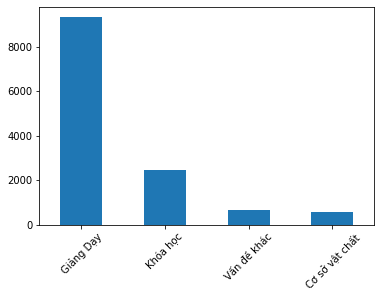

In [17]:
train.topic.map({0.0: "Giảng Dạy", 1.0: "Khóa học", 2.0: "Cơ sở vật chất", 3.0: "Vấn đề khác"}).value_counts().plot.bar(rot=45)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14066 entries, 0 to 1056
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review     14066 non-null  object 
 1   sentiment  14066 non-null  int64  
 2   topic      13009 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 439.6+ KB


* Dữ liệu nhãn các topic mất cân bằng nghiêm trọng
* 0: "Về Giảng Viên", "1": "Về chương trình giảng dạy", 2: "Về cơ sở vật chất", "3": "Và những chủ đề khác".

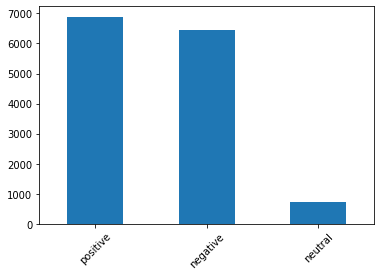

In [19]:
train.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

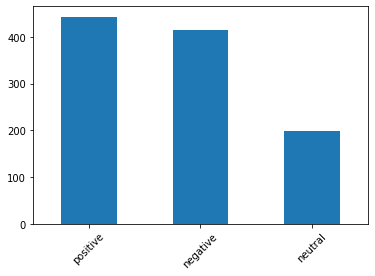

In [20]:
added.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

+ Dữ liệu tập trung nhiều ở 2 lớp quan trọng là positive và negative

In [21]:
train.review.apply(lambda x: len(x.split())).describe()

count    14066.000000
mean        13.867695
std          9.876704
min          2.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        161.000000
Name: review, dtype: float64

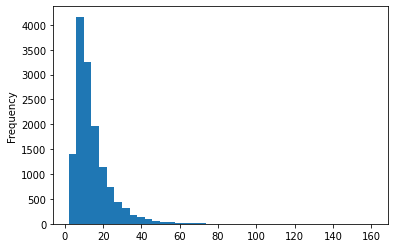

In [22]:
train.review.apply(lambda x: len(x.split())).plot.hist(bins = 40);

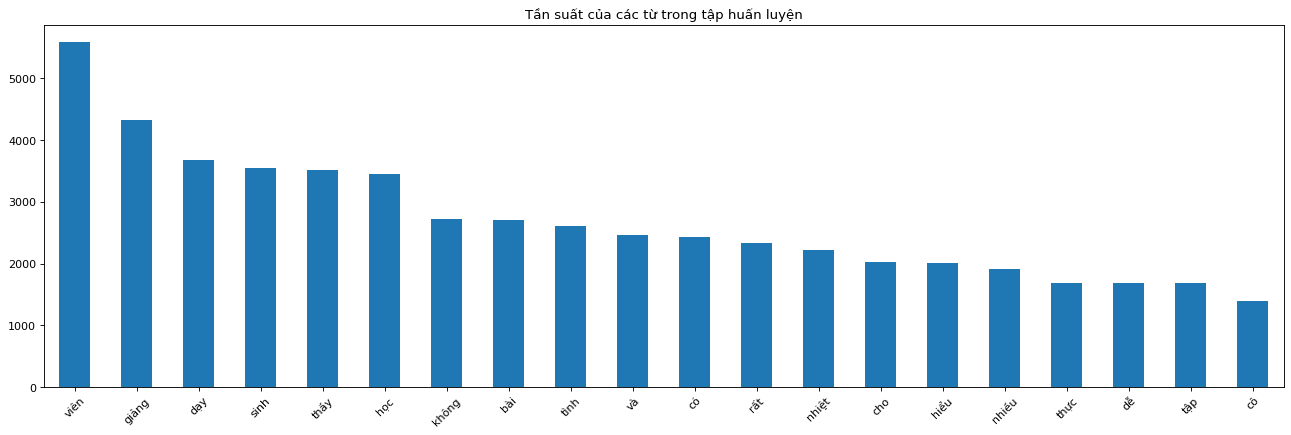

In [23]:
plt.figure(figsize = (20, 6), dpi = 80)
train['review'].str.replace(".","").str.replace(",","").str.split().explode().value_counts().nlargest(20).plot.bar(rot = 45)
plt.title("Tần suất của các từ trong tập huấn luyện");

* max_sequence_lenght = 32

# XLNet

In [24]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import transformers
from transformers import XLNetTokenizer, XLNetModel, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score
from collections import defaultdict
from textwrap import wrap
from pylab import rcParams

from torch import nn, optim
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset,RandomSampler,SequentialSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [26]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [104]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,review,sentiment,topic
0,0,slide giáo trình đầy đủ .,2,1.0
1,1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2,0.0
2,2,đi học đầy đủ full điểm chuyên cần .,0,1.0
3,3,chưa áp dụng công nghệ thông tin và các thiết ...,0,0.0
4,4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2,0.0


In [105]:
df = df.dropna()
df['topic'] = df['topic'].astype(int)

In [29]:
from sklearn.utils import shuffle
df = shuffle(df)

In [30]:
df.shape

(13009, 4)

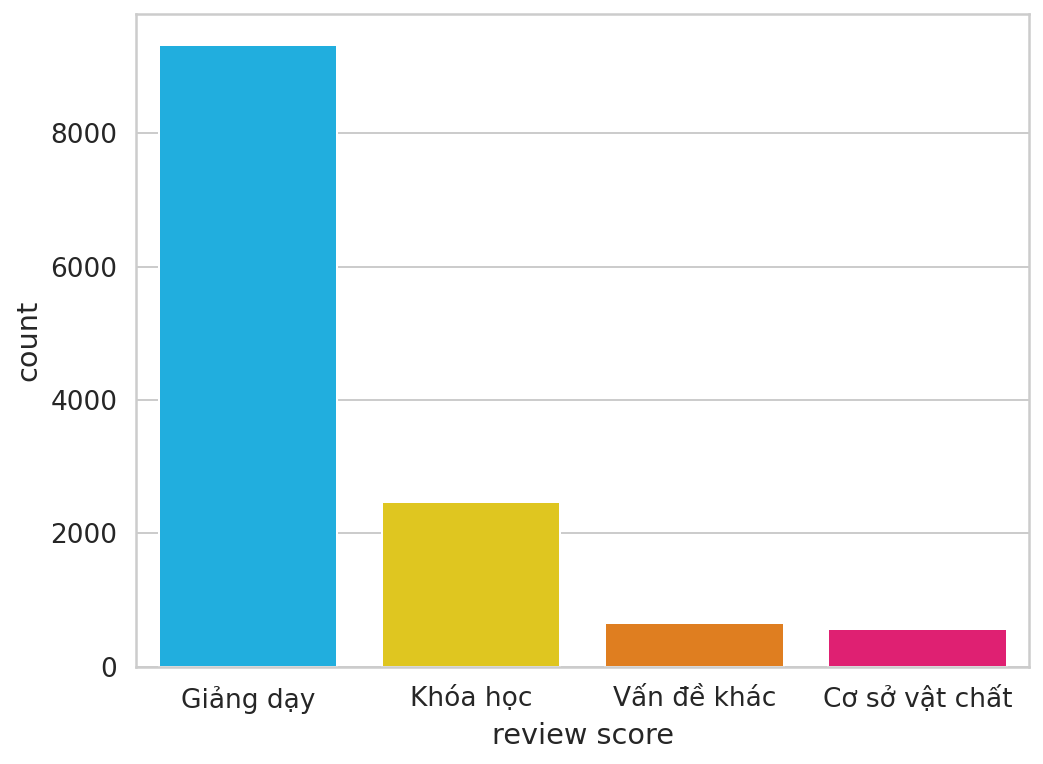

In [32]:
rcParams['figure.figsize'] = 8, 6
sns.countplot(df.topic.map({0.0:"Giảng dạy",1.0: "Khóa học", 2.0: "Cơ sở vật chất", 3.0:"Vấn đề khác"}))
plt.xlabel('review score');

In [33]:
df['topic'].value_counts()

0    9317
1    2468
3     657
2     567
Name: topic, dtype: int64

In [34]:
class_names = ['Giảng dạy','Khóa học', 'Cơ sở vật chất', 'Vấn đè khác']

In [35]:
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer
from sklearn.metrics import classification_report,confusion_matrix

import argparse
import os
import logging
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from vncorenlp import VnCoreNLP
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler
from transformers import XLNetTokenizer, XLNetModel, Trainer, TrainingArguments, XLNetForSequenceClassification
from ray import tune
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
tqdm.pandas()

In [36]:
from transformers import XLNetTokenizer, XLNetModel
PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [37]:
input_txt = "Tôi là sinh viên trường đại học Bách_khoa ."
encodings = tokenizer.encode_plus(input_txt, add_special_tokens=True, max_length=32, return_tensors='pt', return_token_type_ids=False, return_attention_mask=True, pad_to_max_length=False)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [38]:
print('input_ids : ',encodings['input_ids'])

input_ids :  tensor([[  324,   150,  2483,  7565,   409,    17,  2596,   254,    17,  6380,
          2555,    17,     0,  5936,  6938,   369, 12129,  2732,  6049, 14070,
            17,     9,     4,     3]])


In [39]:
tokenizer.convert_ids_to_tokens(encodings['input_ids'][0])

['▁To',
 'i',
 '▁la',
 '▁sin',
 'h',
 '▁',
 'vi',
 'en',
 '▁',
 'tru',
 'ong',
 '▁',
 '<unk>',
 'ai',
 '▁ho',
 'c',
 '▁Bach',
 '_',
 'kh',
 'oa',
 '▁',
 '.',
 '<sep>',
 '<cls>']

In [40]:
type(encodings['attention_mask'])

torch.Tensor

In [41]:
with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as rdrsegmenter:
       df["review"] = df["review"].apply(str).progress_apply(lambda x: ' '.join([' '.join(sent) for sent in rdrsegmenter.tokenize(x)]))

100%|██████████| 13009/13009 [00:49<00:00, 260.45it/s]


In [42]:
from keras.preprocessing.sequence import pad_sequences

In [43]:
attention_mask = pad_sequences(encodings['attention_mask'], maxlen=128, dtype=torch.Tensor ,truncating="post",padding="post")

In [44]:
attention_mask = attention_mask.astype(dtype = 'int64')
attention_mask = torch.tensor(attention_mask) 
attention_mask.flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
encodings['input_ids']

tensor([[  324,   150,  2483,  7565,   409,    17,  2596,   254,    17,  6380,
          2555,    17,     0,  5936,  6938,   369, 12129,  2732,  6049, 14070,
            17,     9,     4,     3]])

In [46]:
token_lens = []

for txt in df['review']:
  tokens = tokenizer.encode(txt, max_length = 256)
  token_lens.append(len(tokens))

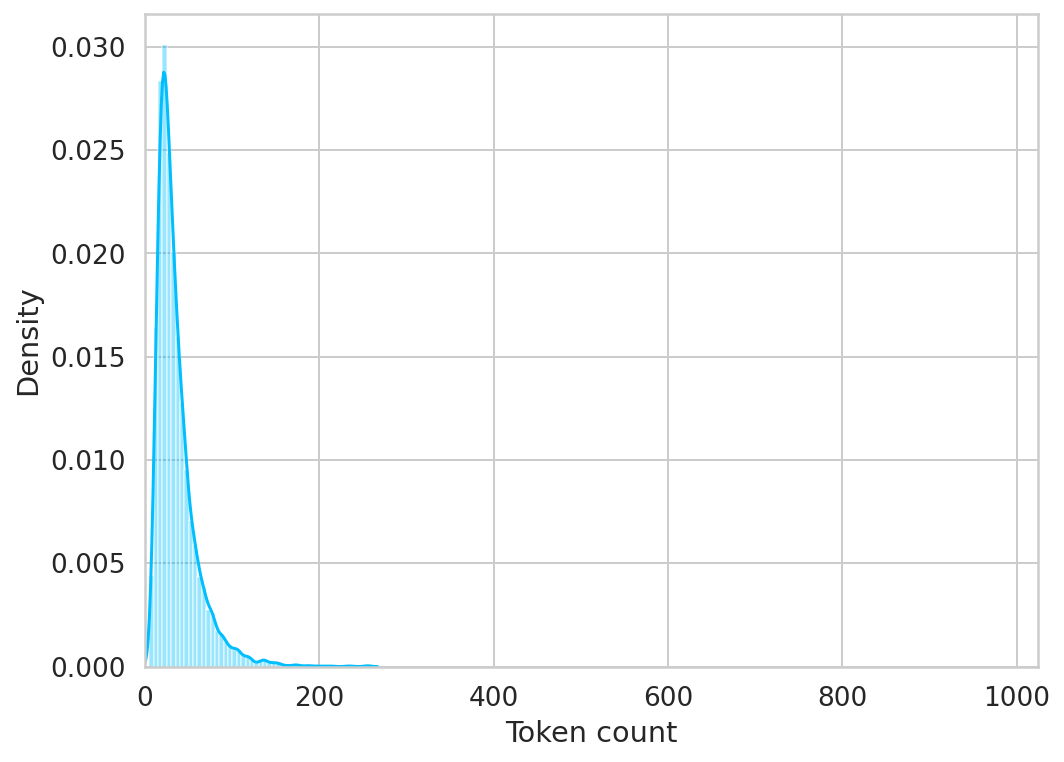

In [47]:
sns.distplot(token_lens)
plt.xlim([0, 1024]);
plt.xlabel('Token count');

In [48]:
MAX_LEN = 256

In [49]:
class XLNetDataset(Dataset):


    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
        review,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=False,
        return_attention_mask=True,
        return_tensors='pt',
        )

        input_ids = pad_sequences(encoding['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
        input_ids = input_ids.astype(dtype = 'int64')
        input_ids = torch.tensor(input_ids) 

        attention_mask = pad_sequences(encoding['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
        attention_mask = attention_mask.astype(dtype = 'int64')
        attention_mask = torch.tensor(attention_mask)       

        return {
        'review_text': review,
        'input_ids': input_ids,
        'attention_mask': attention_mask.flatten(),
        'targets': torch.tensor(target, dtype=torch.long)
        }

In [50]:
df_train, df_test = train_test_split(df, train_size=0.5, random_state=101)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=101)

In [51]:
df_train.shape, df_val.shape, df_test.shape

((6504, 4), (3252, 4), (3253, 4))

In [52]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = XLNetDataset(
    reviews=df.review.to_numpy(),
    targets=df.topic.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [53]:
BATCH_SIZE = 4
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [54]:
from transformers import XLNetForSequenceClassification
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels = 4)
model = model.to(device)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [55]:
model

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward

In [56]:
EPOCHS = 10
BATCH_SIZE = 4

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
                                {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay':  0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay':0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer ,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

In [57]:
data = next(iter(val_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [58]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
targets = data['targets'].to(device)
print(input_ids.reshape(4,256).shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([4, 256])
torch.Size([4, 256])


In [59]:
input_ids[0]

tensor([[ 191,   17, 6026,  101,   17,  180, 2582,  993, 2732, 3370,  409,   17,
            9,    4,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,  

In [60]:
outputs = model(input_ids.reshape(4,256), token_type_ids=None, attention_mask=attention_mask, labels=targets)
outputs

XLNetForSequenceClassificationOutput([('loss',
                                       tensor(1.2571, device='cuda:0', grad_fn=<NllLossBackward0>)),
                                      ('logits',
                                       tensor([[ 0.0611, -0.0711, -0.4477, -0.4898],
                                               [ 0.1248,  0.0069, -0.5968, -0.4594],
                                               [ 0.0121,  0.0123, -0.4239, -0.6112],
                                               [-0.0748, -0.2566, -0.5866, -0.5117]], device='cuda:0',
                                              grad_fn=<AddmmBackward0>)),
                                      ('mems',
                                       (tensor([[[-0.0229,  0.0610,  0.0643,  ..., -0.0802,  0.0477,  0.0372],
                                                 [-0.0387, -0.0099, -0.0053,  ...,  0.0643,  0.0192, -0.0144],
                                                 [-0.0387, -0.0099, -0.0053,  ...,  0.0643,  0.0192, -

In [61]:
type(outputs[0])

torch.Tensor

In [62]:
from sklearn import metrics
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    acc = 0
    counter = 0
  
    for d in data_loader:
        input_ids = d["input_ids"].reshape(4,256).to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)
        loss = outputs[0]
        logits = outputs[1]

        # preds = preds.cpu().detach().numpy()
        _, prediction = torch.max(outputs[1], dim=1)
        targets = targets.cpu().detach().numpy()
        prediction = prediction.cpu().detach().numpy()
        accuracy = metrics.accuracy_score(targets, prediction)

        acc += accuracy
        losses.append(loss.item())
        
        loss.backward()

        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        counter = counter + 1

    return acc / counter, np.mean(losses)

In [63]:
def eval_model(model, data_loader, device, n_examples):
    model = model.eval()
    losses = []
    acc = 0
    counter = 0
  
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].reshape(4,256).to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)
            loss = outputs[0]
            logits = outputs[1]

            _, prediction = torch.max(outputs[1], dim=1)
            targets = targets.cpu().detach().numpy()
            prediction = prediction.cpu().detach().numpy()
            accuracy = metrics.accuracy_score(targets, prediction)

            acc += accuracy
            losses.append(loss.item())
            counter += 1

    return acc / counter, np.mean(losses)

In [64]:

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,     
        optimizer, 
        device, 
        scheduler,
        len(df_train)
    )

    print(f'Train loss {train_loss} Train accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_data_loader, 
        device, 
        len(df_val)
    )

    print(f'Val loss {val_loss} Val accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), '/content/xlnet_sentiment/xlnet_model.bin')
        best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.7470035465007624 Train accuracy 0.7702952029520295
Val loss 0.7233432422553591 Val accuracy 0.756150061500615

Epoch 2/10
----------
Train loss 0.6344667425002418 Train accuracy 0.8273370233702337
Val loss 0.6821814757387462 Val accuracy 0.8065805658056581

Epoch 3/10
----------
Train loss 0.5876723662967998 Train accuracy 0.8508610086100861
Val loss 0.6962515263071314 Val accuracy 0.8444034440344403

Epoch 4/10
----------
Train loss 0.5249663941178921 Train accuracy 0.8760762607626076
Val loss 0.7808031049570777 Val accuracy 0.8400984009840098

Epoch 5/10
----------
Train loss 0.49312385085353433 Train accuracy 0.8880688806888068
Val loss 0.6851366649282727 Val accuracy 0.8480934809348093

Epoch 6/10
----------
Train loss 0.44905950266425126 Train accuracy 0.9005227552275523
Val loss 0.7912460430370596 Val accuracy 0.8514760147601476

Epoch 7/10
----------
Train loss 0.39152631197198967 Train accuracy 0.9109778597785978
Val loss 0.7360617868535835 Va

In [65]:
model.load_state_dict(torch.load('/content/xlnet_sentiment/xlnet_model.bin'))

<All keys matched successfully>

In [95]:
model = model.to(device)

In [116]:
from sklearn.metrics import classification_report,confusion_matrix
def show_confusion_matrix(confusion_matrix):

  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
def get_predictions(model, data_loader):
    model = model.eval()
    
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:

            texts = d["review_text"]
            input_ids = d["input_ids"].reshape(-1,256).to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)

            loss = outputs[0]
            logits = outputs[1]
            
            _, preds = torch.max(outputs[1], dim=1)

            probs = F.softmax(outputs[1], dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()


    cm = confusion_matrix(y_test, predictions ,normalize="true")

    ax = sns.heatmap(cm, annot=True,  cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    return review_texts, predictions, prediction_probs, real_values

                precision    recall  f1-score   support

     Giảng dạy       0.91      0.93      0.92      2338
      Khóa học       0.73      0.72      0.73       618
Cơ sở vật chất       0.88      0.75      0.81       134
   Vấn đè khác       0.49      0.43      0.46       163

      accuracy                           0.86      3253
     macro avg       0.75      0.71      0.73      3253
  weighted avg       0.85      0.86      0.86      3253



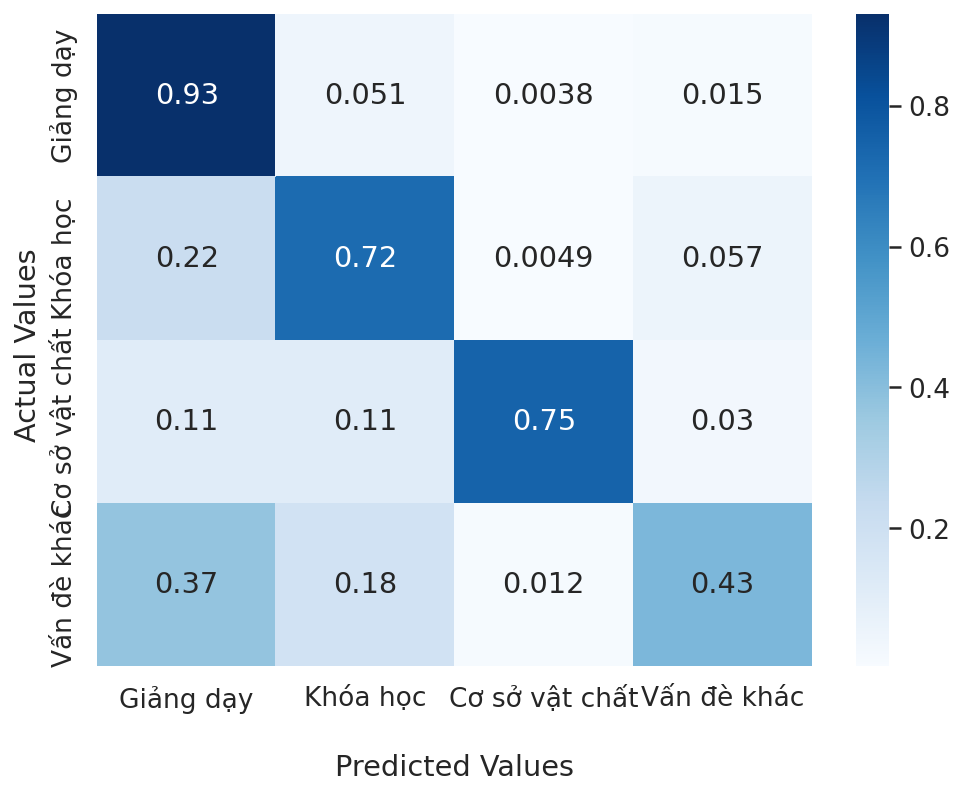

In [117]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model,test_data_loader)
print(classification_report(y_test, y_pred, target_names=class_names))

In [75]:
def predict_topic(text):
    review_text = text
    with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as rdrsegmenter:
      review_text = ' '.join([' '.join(sent) for sent in rdrsegmenter.tokenize(review_text)])

    encoded_review = tokenizer.encode_plus(
    review_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=False,
    return_attention_mask=True,
    return_tensors='pt',
    )

    input_ids = pad_sequences(encoded_review['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    input_ids = input_ids.astype(dtype = 'int64')
    input_ids = torch.tensor(input_ids) 

    attention_mask = pad_sequences(encoded_review['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    attention_mask = attention_mask.astype(dtype = 'int64')
    attention_mask = torch.tensor(attention_mask) 

    input_ids = input_ids.reshape(-1,256).to(device)
    attention_mask = attention_mask.to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    outputs = outputs[0][0].cpu().detach()

    probs = F.softmax(outputs, dim=-1).cpu().detach().numpy().tolist()
    _, prediction = torch.max(outputs, dim =-1)

    print("Vấn đề khác:", probs[3])
    print("Cơ sở vật chất:", probs[2])
    print("Khóa học:" , probs[1])
    print("Giảng dạy:", probs[0])
    print(f'Review text: {review_text}')
    print(f'Topic  : {class_names[prediction]}')

In [76]:
text = "cung cấp đầy đủ tài liệu tham khảo"
predict_topic(text)

Vấn đề khác: 0.00024339908850379288
Cơ sở vật chất: 0.00010029772238340229
Khóa học: 0.00023466894344892353
Giảng dạy: 0.9994215965270996
Review text: cung_cấp đầy_đủ tài_liệu tham_khảo
Topic  : Giảng dạy


In [77]:
text = "tài liệu không chi tiết lắm"
predict_topic(text)

Vấn đề khác: 0.0009481121087446809
Cơ sở vật chất: 0.0008319918997585773
Khóa học: 0.996180534362793
Giảng dạy: 0.002039325423538685
Review text: tài_liệu không chi_tiết lắm
Topic  : Khóa học


In [78]:
text = "có hứng thú học"
predict_topic(text)

Vấn đề khác: 0.00030877761309966445
Cơ sở vật chất: 0.00011754632578231394
Khóa học: 0.00032347955857403576
Giảng dạy: 0.9992501139640808
Review text: có hứng_thú học
Topic  : Giảng dạy


In [79]:
text = "cô dạy buồn ngủ "
predict_topic(text)

Vấn đề khác: 0.00011247261863900349
Cơ sở vật chất: 6.131907139206305e-05
Khóa học: 7.270467904163525e-05
Giảng dạy: 0.9997534155845642
Review text: cô dạy buồn_ngủ
Topic  : Giảng dạy


In [80]:
text = "thiết bị hư hỏng"
predict_topic(text)

Vấn đề khác: 0.0008238176815211773
Cơ sở vật chất: 0.9961680769920349
Khóa học: 0.0016779471188783646
Giảng dạy: 0.0013301899889484048
Review text: thiết_bị hư_hỏng
Topic  : Cơ sở vật chất


In [81]:
text = "thầy giáo rất vui tính"
predict_topic(text)

Vấn đề khác: 8.898687519831583e-05
Cơ sở vật chất: 5.2722425607498735e-05
Khóa học: 5.2921004680683836e-05
Giảng dạy: 0.9998053908348083
Review text: thầy_giáo rất vui_tính
Topic  : Giảng dạy


In [82]:
text = "môn học không hấp dẫn"
predict_topic(text)

Vấn đề khác: 0.0009004697785712779
Cơ sở vật chất: 0.0008218390867114067
Khóa học: 0.9962189793586731
Giảng dạy: 0.0020587637554854155
Review text: môn_học không hấp_dẫn
Topic  : Khóa học


In [83]:
text = "thầy ít quan sát thực hành "
predict_topic(text)

Vấn đề khác: 9.457155101699755e-05
Cơ sở vật chất: 5.480620893649757e-05
Khóa học: 5.7149176427628845e-05
Giảng dạy: 0.9997934699058533
Review text: thầy ít quan_sát thực_hành
Topic  : Giảng dạy


In [84]:
text = "có sai sót trong chấm thi"
predict_topic(text)

Vấn đề khác: 0.0019511872669681907
Cơ sở vật chất: 0.000520905654411763
Khóa học: 0.0032054216135293245
Giảng dạy: 0.9943224191665649
Review text: có sai_sót trong chấm thi
Topic  : Giảng dạy


In [85]:
text = "cô nhiệt tình trong việc trao đổi, giúp đỡ trong việc học của sinh viên"
predict_topic(text)

Vấn đề khác: 0.0004679877602029592
Cơ sở vật chất: 0.0001586082944413647
Khóa học: 0.0005408779834397137
Giảng dạy: 0.9988325238227844
Review text: cô nhiệt_tình trong việc trao_đổi , giúp_đỡ trong việc học của sinh_viên
Topic  : Giảng dạy


In [86]:
text ='slide giáo trình đầy đủ'
predict_topic(text)

Vấn đề khác: 0.000938367797061801
Cơ sở vật chất: 0.0008301523048430681
Khóa học: 0.9961899518966675
Giảng dạy: 0.0020415240433067083
Review text: slide giáo_trình đầy_đủ
Topic  : Khóa học


In [87]:
text ='thầy ít quan tâm sinh viên thực hành'
predict_topic(text)

Vấn đề khác: 8.884182898327708e-05
Cơ sở vật chất: 5.259715180727653e-05
Khóa học: 5.2859035349683836e-05
Giảng dạy: 0.9998058676719666
Review text: thầy ít quan_tâm sinh_viên thực_hành
Topic  : Giảng dạy


In [88]:
text ='sinh viên học ghép không tuân thủ nội quy lớp học, hay nói chuyện trong giờ và không tôn trọng giáo viên'
predict_topic(text)

Vấn đề khác: 0.07309015840291977
Cơ sở vật chất: 0.04608478397130966
Khóa học: 0.4455178380012512
Giảng dạy: 0.43530726432800293
Review text: sinh_viên học ghép không tuân_thủ nội_quy lớp_học , hay nói_chuyện trong giờ và không tôn_trọng giáo_viên
Topic  : Khóa học


In [89]:
text = "thực hành khó hiểu"
predict_topic(text)

Vấn đề khác: 0.0009455857798457146
Cơ sở vật chất: 0.0008316383464261889
Khóa học: 0.9961817264556885
Giảng dạy: 0.002041035098955035
Review text: thực_hành khó hiểu
Topic  : Khóa học


In [90]:
text = "em không muốn nói gì nhưng mong thầy xem lại cách đánh giá sinh viên để công bằng hơn , cái sinh viên không biết không phải chỉ ở cúp tiết mà còn ở cách giảng dạy , truyền đạt ở giảng viên , ví dụ như cô wzjwz324 , rất dễ hiểu , tận tâm ."
predict_topic(text)

Vấn đề khác: 0.00013486703392118216
Cơ sở vật chất: 6.869656499475241e-05
Khóa học: 9.560304170008749e-05
Giảng dạy: 0.9997009038925171
Review text: em không muốn nói gì nhưng mong thầy xem_lại cách đánh_giá sinh_viên để công_bằng hơn , cái sinh_viên không biết không phải chỉ ở cúp tiết mà_còn ở cách giảng_dạy , truyền_đạt ở giảng_viên , ví_dụ như cô wzjwz324 , rất dễ hiểu , tận_tâm .
Topic  : Giảng dạy
